In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
column_sums = df.sum()
print(column_sums)

Gas Warm Air Furnaces                                   17663826.0
Oil Warm Air Furnaces                                     168834.0
Residential Gas Automatic Storage Water Heaters         22347266.0
Residential Electric Automatic Storage Water Heaters    23212711.0
Commercial Gas Storage Water Heaters                      429497.0
Commercial Electric Storage Water Heaters                 713474.0
Unitary_Air_Conditioning                                28645961.0
Unitary_Heat_Pump                                       18396195.0
Unitary_AC_HP_sub16.5                                    1890908.0
Unitary_AC_HP_16.5-21.9                                  4654942.0
Unitary_AC_HP_22.0-26.9                                  9245470.0
Unitary_AC_HP_27.0-32.9                                  7281180.0
Unitary_AC_HP_33.0-38.9                                  9815765.0
Unitary_AC_HP_39.0-43.9                                  3497897.0
Unitary_AC_HP_44.0-53.9                                  51676

C:\Users\bober\AppData\Local\Temp\ipykernel_16996\4015132398.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()


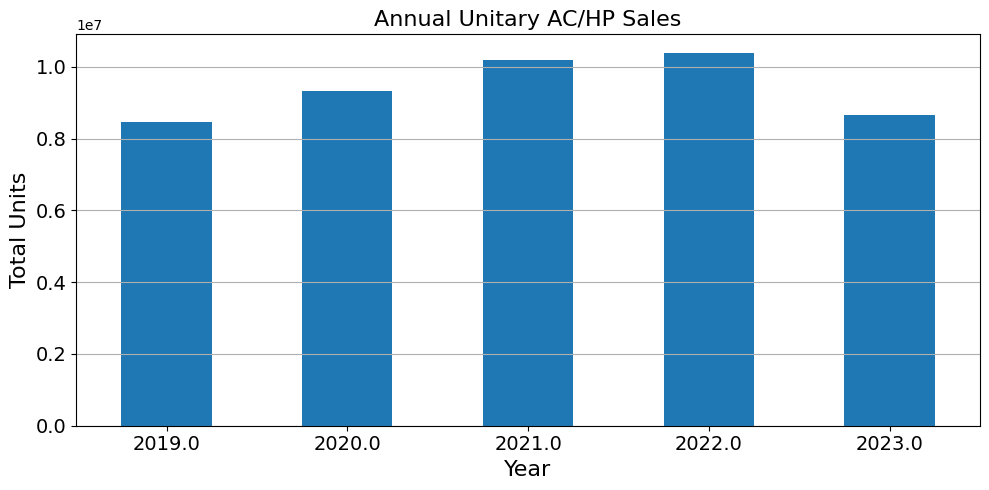

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filepath' is the path to your CSV file
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# List of Unitary AC/HP categories
unitary_categories = [
    'Unitary_Air_Conditioning','Unitary_Heat_Pump'
]

# Sum up the values for each year for the specified categories
summed_unitary_data = df.groupby('Year')[unitary_categories].sum()
total_unitary_df = summed_unitary_data['Unitary_Air_Conditioning'] + summed_unitary_data['Unitary_Heat_Pump']

# Plotting
total_unitary_df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Annual Unitary AC/HP Sales',fontsize=16)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

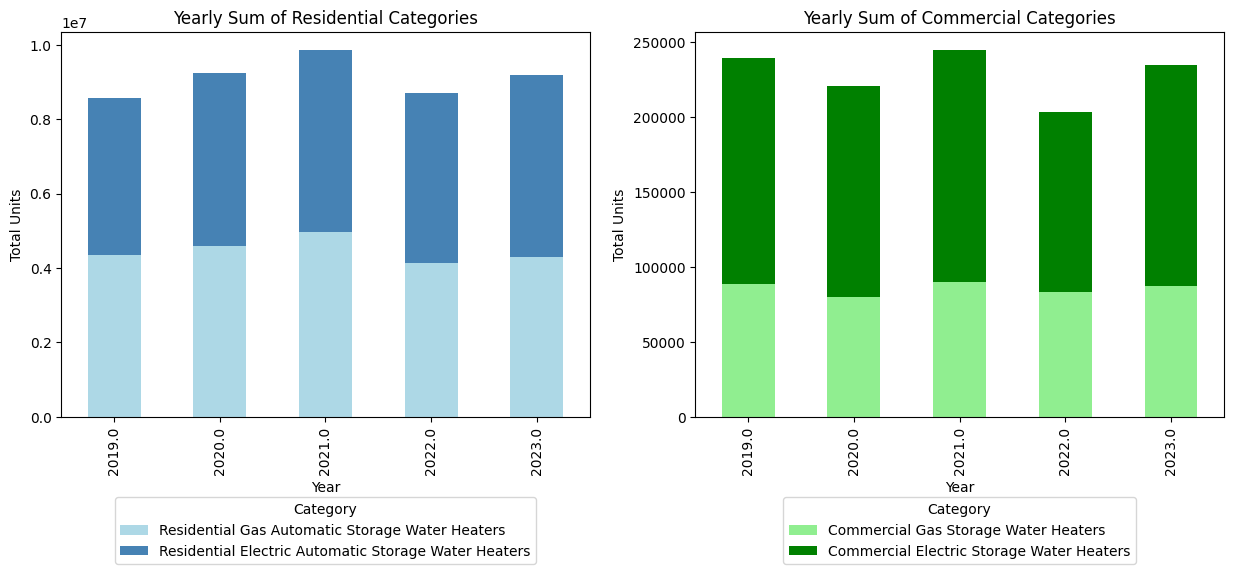

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                  'Residential Electric Automatic Storage Water Heaters', 
                                  'Commercial Gas Storage Water Heaters', 
                                  'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                       'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                      'Commercial Electric Storage Water Heaters']].sum()

#annual_data = df.groupby('Year')[['Gas Warm Air Furnaces']].sum()

annual_df = df.groupby('Year')[['Commercial Gas Storage Water Heaters']].sum()


# Define a color map for the categories
color_map = {
    'Residential Gas Automatic Storage Water Heaters': 'lightblue',
    'Residential Electric Automatic Storage Water Heaters': 'steelblue',
    'Commercial Gas Storage Water Heaters': 'lightgreen',
    'Commercial Electric Storage Water Heaters': 'green'
}

fig, ax = plt.subplots(1,2,figsize = (15,5))

# Residential Plot with specified colors
residential_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in residential_data.columns], ax=ax[0])
ax[0].set_title('Yearly Sum of Residential Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Commercial Plot with specified colors
commercial_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in commercial_data.columns], ax=ax[1])
ax[1].set_title('Yearly Sum of Commercial Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

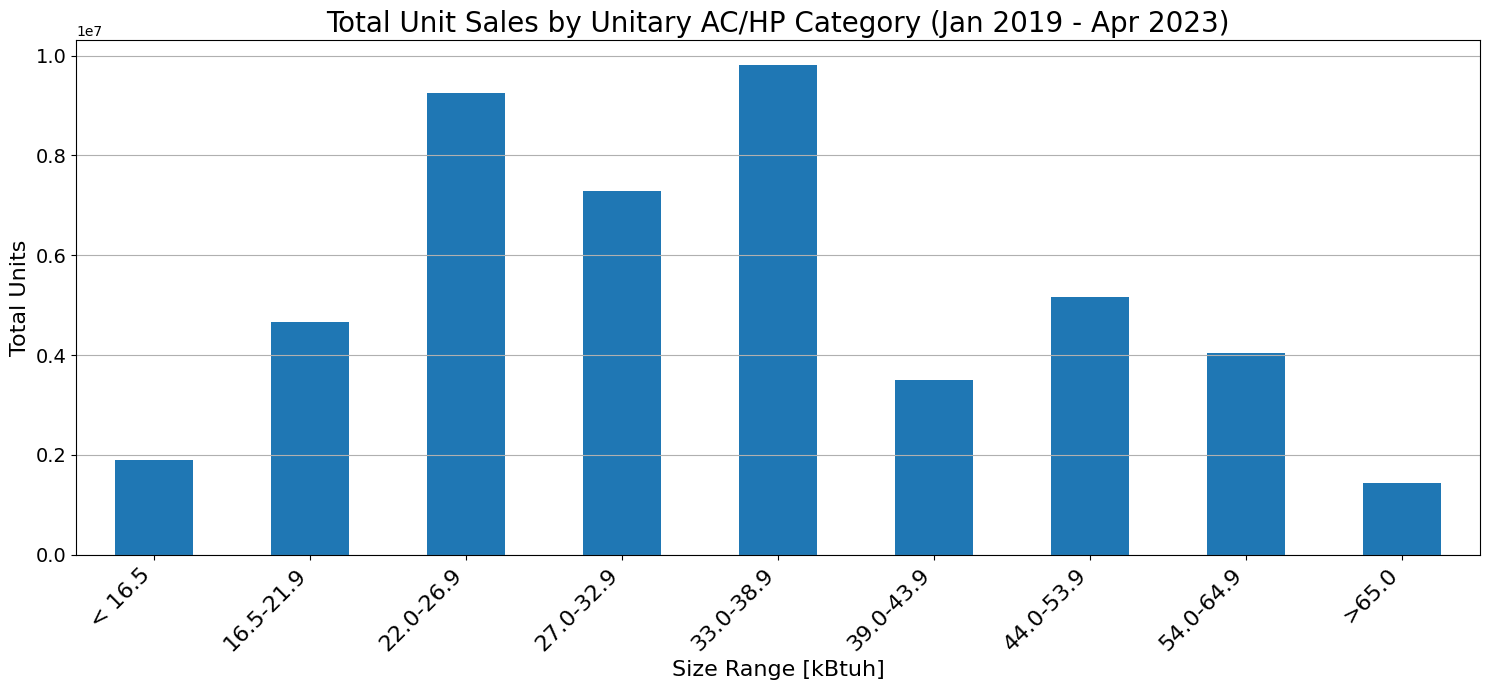

In [4]:
# Load the dataset
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Consolidate all columns with capacities greater than 65.0 kBtuh
high_capacity_bins = ['Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]
num = 0
for name in high_capacity_bins:
    if num == 0:
        high_capacity_sum = df[name]
    else: high_capacity_sum = high_capacity_sum + df[name]
    num = num+1
high_capacity_sum = pd.DataFrame(high_capacity_sum)
high_capacity_sum.columns = ['>65.0']
df = pd.merge(df,high_capacity_sum,left_index=True,right_index=True)


# List of Unitary AC/HP categories 
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', '>65.0'
]

mylabels = [
    '< 16.5', '16.5-21.9', '22.0-26.9',
    '27.0-32.9', '33.0-38.9', '39.0-43.9',
    '44.0-53.9', '54.0-64.9', '>65.0'
]
y_pos = np.arange(len(mylabels))

# Check if all categories are present in the dataset columns
available_categories = [cat for cat in unitary_categories if cat in df.columns]

# Sum the values for each category across all years
summed_categories = df[available_categories].sum()

# Plotting
summed_categories.plot(kind='bar', figsize=(15, 7))
plt.title('Total Unit Sales by Unitary AC/HP Category (Jan 2019 - Apr 2023)',fontsize=20)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Size Range [kBtuh]',fontsize=16)
plt.xticks(y_pos,mylabels,rotation=45,fontsize=16,horizontalalignment='right') 
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

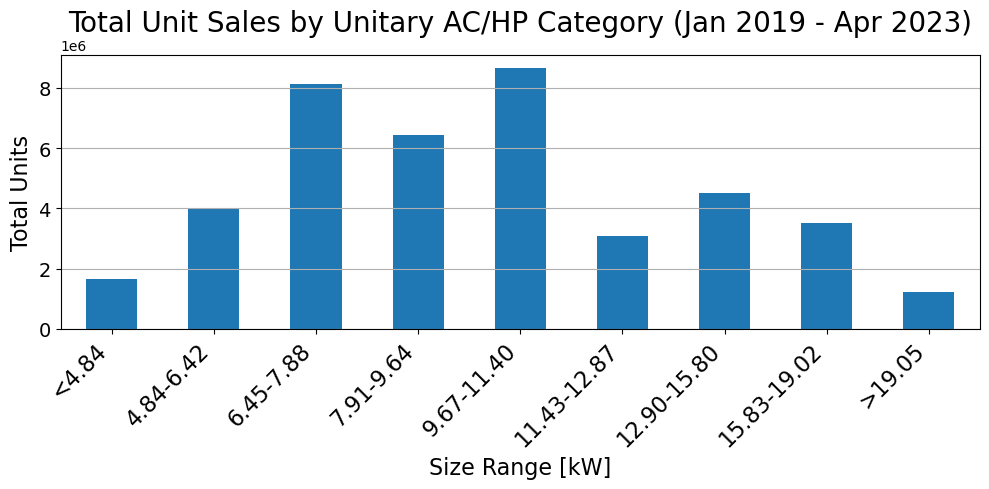

In [22]:
# Load the dataset
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Consolidate all columns with capacities greater than 65.0 kBtuh
high_capacity_bins = ['Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]
num = 0
for name in high_capacity_bins:
    if num == 0:
        high_capacity_sum = df[name]
    else: high_capacity_sum = high_capacity_sum + df[name]
    num = num+1
high_capacity_sum = pd.DataFrame(high_capacity_sum)
high_capacity_sum.columns = ['>65.0']
df = pd.merge(df,high_capacity_sum,left_index=True,right_index=True)

# Convert kBtuh bin labels to kW
conversion = 3.412142
binlabels = [
    '<'+str(format(16.5/conversion,".2f")), 
    str(format(16.5/conversion,".2f"))+'-'+str(format(21.9/conversion,".2f")), 
    str(format(22.0/conversion,".2f"))+'-'+str(format(26.9/conversion,".2f")),
    str(format(27.0/conversion,".2f"))+'-'+str(format(32.9/conversion,".2f")),
    str(format(33.0/conversion,".2f"))+'-'+str(format(38.9/conversion,".2f")),
    str(format(39.0/conversion,".2f"))+'-'+str(format(43.9/conversion,".2f")),
    str(format(44.0/conversion,".2f"))+'-'+str(format(53.9/conversion,".2f")),
    str(format(54.0/conversion,".2f"))+'-'+str(format(64.9/conversion,".2f")),
    '>'+str(format(65.0/conversion,".2f"))
]

# List of Unitary AC/HP categories 
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', '>65.0'
]

y_pos = np.arange(len(binlabels))

# Check if all categories are present in the dataset columns
available_categories = [cat for cat in unitary_categories if cat in df.columns]

# Sum the values for each category across all years
summed_categories = df[available_categories].sum()

# Plotting
summed_categories.plot(kind='bar', figsize=(10, 5))
plt.title('Total Unit Sales by Unitary AC/HP Category (Jan 2019 - Apr 2023)',fontsize=20)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Size Range [kW]',fontsize=16)
plt.xticks(y_pos,binlabels,rotation=45,fontsize=16,horizontalalignment='right') 
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

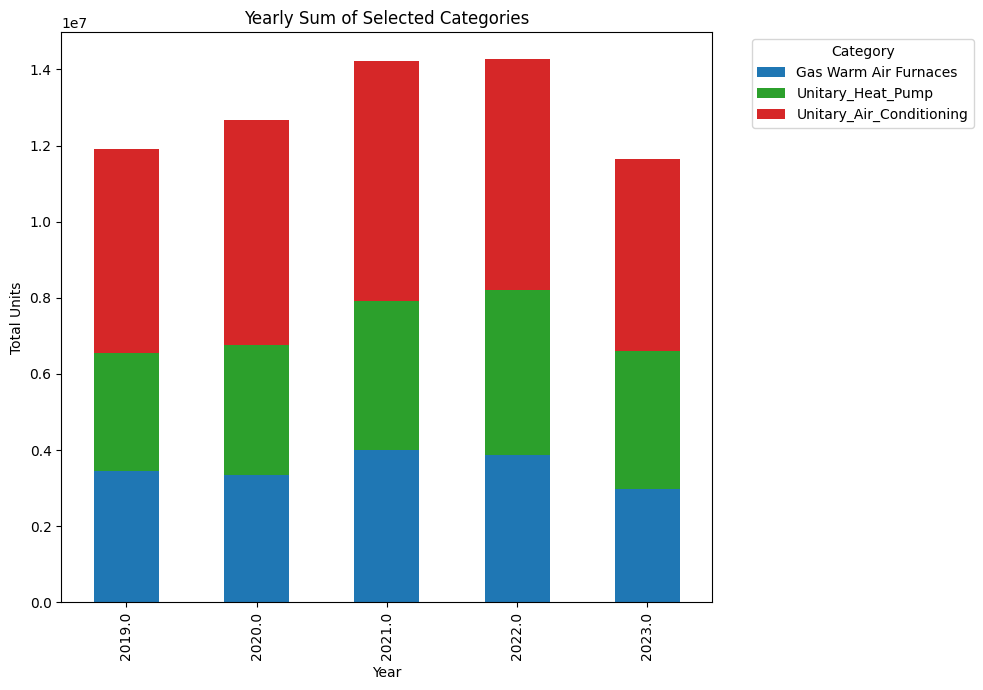

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Gas Warm Air Furnaces', 'Unitary_Heat_Pump', 'Unitary_Air_Conditioning']].sum()

# Define a color map for the categories
color_map = {
    'Gas Warm Air Furnaces': 'tab:blue',
    'Unitary_Heat_Pump': 'tab:green',
    'Unitary_Air_Conditioning': 'tab:red'
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Combined Plot with specified colors
summed_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in summed_data.columns], ax=ax)
ax.set_title('Yearly Sum of Selected Categories')
ax.set_ylabel('Total Units')
ax.set_xlabel('Year')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

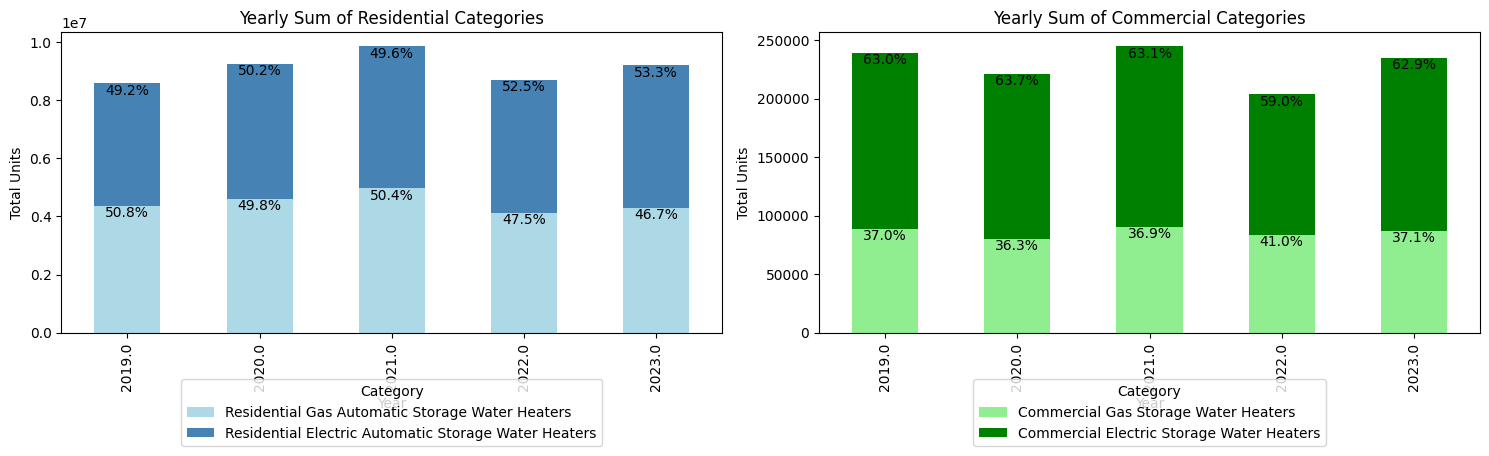

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                  'Residential Electric Automatic Storage Water Heaters', 
                                  'Commercial Gas Storage Water Heaters', 
                                  'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                       'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                      'Commercial Electric Storage Water Heaters']].sum()

# Calculate the percentage of each category for each year
residential_percentages = residential_data.div(residential_data.sum(axis=1), axis=0) * 100
commercial_percentages = commercial_data.div(commercial_data.sum(axis=1), axis=0) * 100

# Define a color map for the categories
color_map = {
    'Residential Gas Automatic Storage Water Heaters': 'lightblue',
    'Residential Electric Automatic Storage Water Heaters': 'steelblue',
    'Commercial Gas Storage Water Heaters': 'lightgreen',
    'Commercial Electric Storage Water Heaters': 'green'
}

fig, ax = plt.subplots(1,2,figsize = (15,5))

# Residential Plot with specified colors
residential_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in residential_data.columns], ax=ax[0])
ax[0].set_title('Yearly Sum of Residential Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Add percentages on the bars
for i, year in enumerate(residential_data.index):
    for j, category in enumerate(residential_data.columns):
        percentage = residential_percentages.loc[year, category]
        ax[0].text(i, residential_data.loc[year, :].cumsum()[j], f'{percentage:.1f}%', ha='center', va='top')

# Commercial Plot with specified colors
commercial_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in commercial_data.columns], ax=ax[1])
ax[1].set_title('Yearly Sum of Commercial Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Add percentages on the bars
for i, year in enumerate(commercial_data.index):
    for j, category in enumerate(commercial_data.columns):
        percentage = commercial_percentages.loc[year, category]
        # Subtract a value from the y-coordinate to lower the position of the text
        ax[1].text(i, commercial_data.loc[year, :].cumsum()[j], f'{percentage:.1f}%', ha='center', va='top')

plt.tight_layout()
plt.show()

'/mnt/data/wheatsiz_distribution_bar_chart_clean.png'

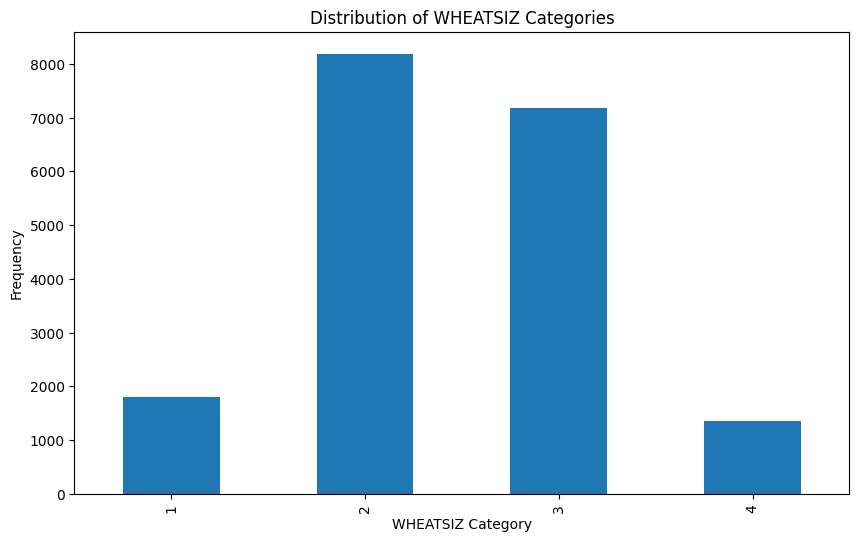

In [29]:
import pandas as pd
import numpy as np

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

wheatsiz_counts = df['WHEATSIZ'].value_counts().sort_index()
plot = wheatsiz_counts.plot(kind='bar', title='Distribution of WHEATSIZ Categories', figsize=(10, 6))
plot.set_xlabel('WHEATSIZ Category')
plot.set_ylabel('Frequency')
plot_path_clean

Text(0, 0.5, 'Frequency')

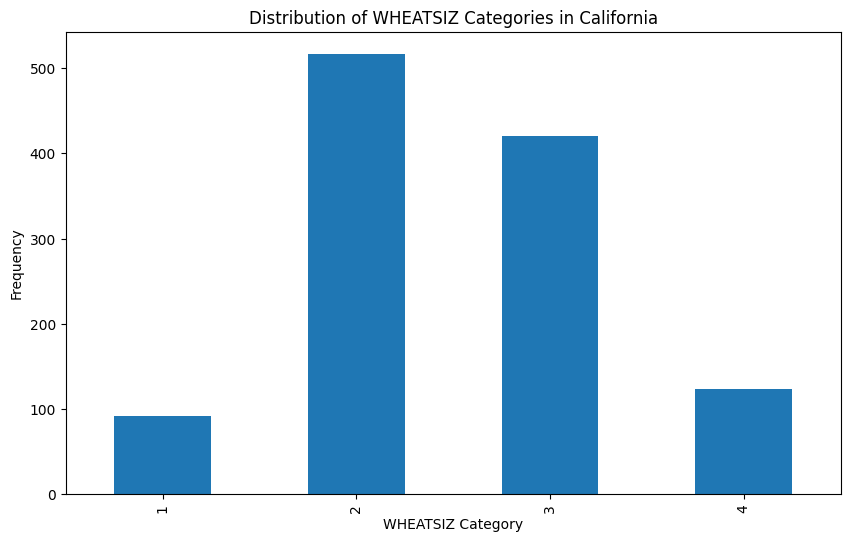

In [31]:
df_ca = df[df['state_postal'] == 'CA']

wheatsiz_counts_ca = df_ca['WHEATSIZ'].value_counts().sort_index()
plot_ca = wheatsiz_counts_ca.plot(kind='bar', title='Distribution of WHEATSIZ Categories in California', figsize=(10, 6))
plot_ca.set_xlabel('WHEATSIZ Category')
plot_ca.set_ylabel('Frequency')


Text(0, 0.5, '')

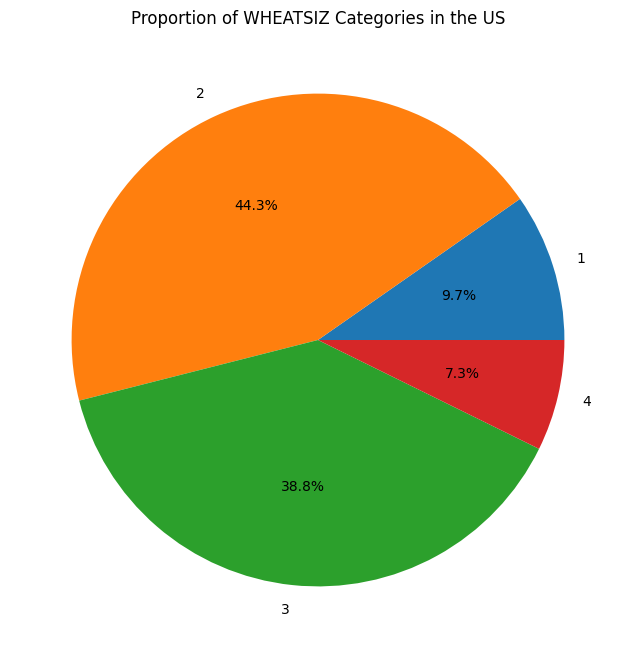

In [33]:
wheatsiz_counts_us = df['WHEATSIZ'].value_counts().sort_index()
pie_chart = wheatsiz_counts_us.plot(kind='pie', title='Proportion of WHEATSIZ Categories in the US', figsize=(8, 8), autopct='%1.1f%%')
pie_chart.set_ylabel('')  # Remove the y-label as it's not necessary for pie charts
